In [6]:
import nltk.sentiment.vader as vader
import matplotlib.pyplot as plt
import datetime
import numpy as np

analyzer = vader.SentimentIntensityAnalyzer()

dates = []
tweetScores = []

In [7]:
#Read in the tweets
with open("unitedAirlineTweets.txt", "r") as f:
    tweets = f.readlines()
    for tweet in tweets:
        split = tweet.split(" ",2)                                                                                                                                                           
        a = split[0]
        b = split[-1]
        tweet = [a,b]                                                                                                                                                                             

        score = analyzer.polarity_scores(tweet[1])['compound']

        dates.append(tweet[0])
        tweetScores.append(score)                                                                                                                                                                             
f.close()

In [8]:
#Sorting by dates
strp = datetime.datetime.strptime

tweets = sorted(zip(dates,tweetScores),  key=lambda d: (strp(d[0],"%Y-%m-%d"), d[1]))

In [9]:
#Daily averages
dates = []
scores = []
replicates = []

j=1
for i in range(len(tweets)):
    if i==0 or dates[-1] != tweets[i][0]:
        dates.append(tweets[i][0])
        scores.append(tweets[i][1])
        replicates.append(1)
        j=1
    else:
        scores[-1] += tweets[i][1]
        j += 1

        if i+1 < len(tweets) and tweets[i+1][0] != tweets[i][0]:
            replicates.append(j)
            scores[-1] /= j
        elif i == len(tweets)-1:
            replicates.append(j)
            scores[-1] /= j

Text(0.5,0,'Date')

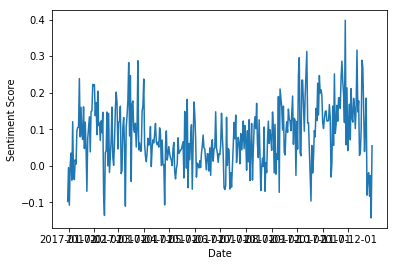

In [10]:
#Plot results
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(dates,scores)

xticks =["2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01", "2017-07-01", "2017-08-01", "2017-09-01", "2017-10-01", "2017-11-01", "2017-12-01"]

ax.xaxis.set_ticks(xticks)
ax.xaxis.set_ticklabels(xticks)
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Date")

In [12]:
#Smooth the results with random forest
X = np.array(range(len(dates))).reshape(-1,1)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X,scores)
predictions = rf.predict(X)


ValueError: Unknown label type: 'continuous'

In [ ]:
#plot
#Plot results
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.plot(dates,predictions)

xticks =["2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01", "2017-07-01", "2017-08-01", "2017-09-01", "2017-10-01", "2017-11-01", "2017-12-01"]

ax.xaxis.set_ticks(xticks)
ax.xaxis.set_ticklabels(xticks)
ax.set_ylabel("Sentiment Score")
ax.set_xlabel("Date")